In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import joblib

In [42]:
df = pd.read_csv('../data/heart_disease.csv')
X = df.drop('target', axis=1)
y = df['target']

Text(0.5, 1.0, 'Elbow Method for Optimal K')

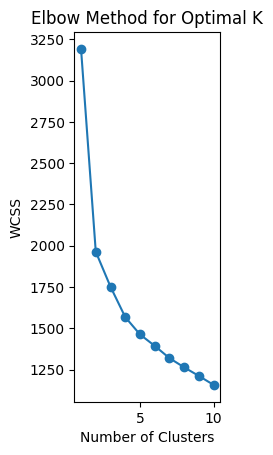

In [43]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.subplot(1, 3, 1)
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')

In [44]:
kmeans = KMeans(n_clusters=2, random_state=42)
k_labels = kmeans.fit_predict(X)

In [45]:
print(f'KMeans Silhouette Score: {silhouette_score(X, k_labels)}')

KMeans Silhouette Score: 0.3632401174541864


In [46]:
joblib.dump(kmeans, '../models/kmeans_model.pkl')

['../models/kmeans_model.pkl']

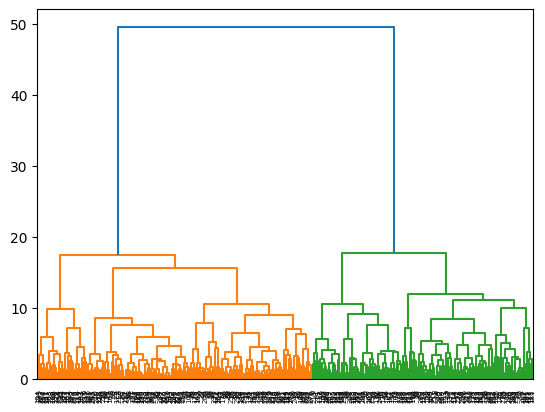

In [47]:
dendogram = dendrogram(linkage(X, method='ward'))

In [48]:
heirarchical = AgglomerativeClustering(n_clusters=2)
h_labels = heirarchical.fit_predict(X)

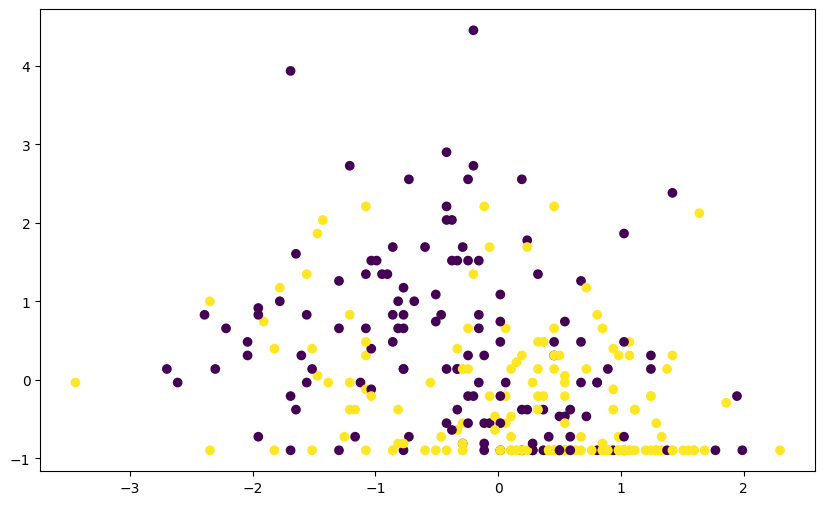

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=h_labels, cmap='viridis')

In [50]:
print(f'KMeans Silhouette Score: {silhouette_score(X, h_labels)}')

KMeans Silhouette Score: 0.3632401174541864


In [51]:
joblib.dump(heirarchical, '../models/heir_clustering_model.pkl')

['../models/heir_clustering_model.pkl']